# 🌏 Scenario

You are have been hired by an NGO to learn about the economic development of countries in Central America: Belize, Costa Rica, El Salvador, Guatemala, Honduras, Nicaragua, and Panama. 

Using data from 1960 through to 2016, you have been asked to give a deep-dive on the GDP growth of each country per year and decade. Your manager is also interested in how each country compares to the regional average.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

Takeaways:
1. Countries of interest: Belize, Costa Rica, El Salvador, Guatemala, Honduras, Nicaragua, and Panama
2. Time frame: 1960 to 2016 (inclusive)
3. Tasks
    1. Analyse GDP growth of each country *per year* **and** *decade* 
    2. Calculate the regional average GDP growth *per year* **and** *decade* 
    3. Compare the GDP growth of each country to the regional average
    4. Write an accessible report outlining the
        1. Motivation
        2. Steps
        3. Findings
        4. Conclusions

## Packages

In [4]:
import numpy as np
import polars as pl 
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [5]:
data = pl.read_csv('gdp.csv')

central_america = data.clone().filter(
    pl.col('Country Name').is_in(['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama']) &
    pl.col('Year').is_between(1960, 2016)
)

central_america.head()

Country Name,Country Code,Year,Value
str,str,i64,f64
"""Belize""","""BLZ""",1960,2.8072e7
"""Belize""","""BLZ""",1961,2.9965e7
"""Belize""","""BLZ""",1962,3.1858e7
"""Belize""","""BLZ""",1963,3.3750e7
"""Belize""","""BLZ""",1964,3.6195e7


## Comparing all countries throughout the 56 years

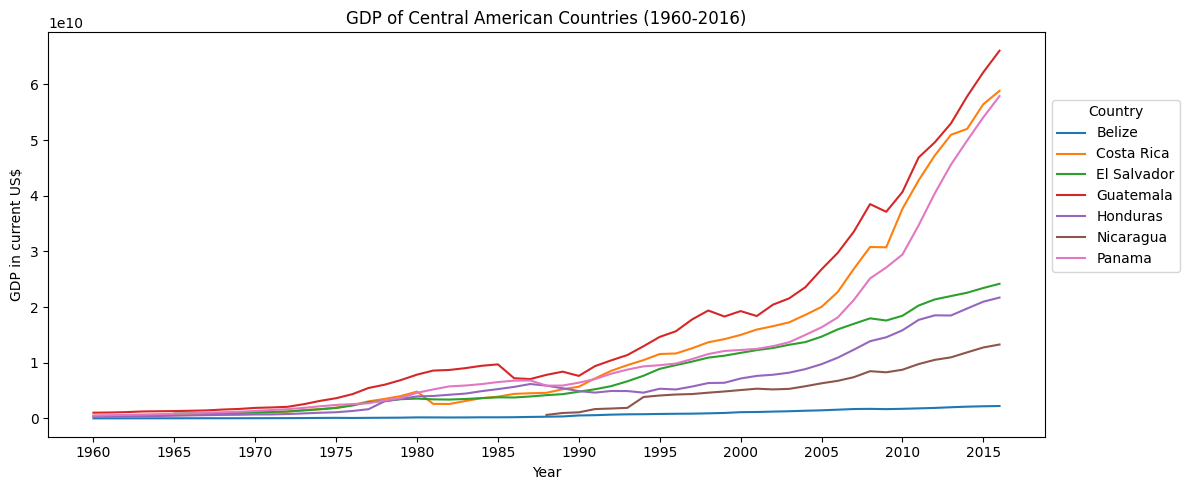

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.lineplot(
    data=central_america,
    x='Year',
    y='Value',
    hue='Country Name',
    ax=ax
)

ax.set_title('GDP of Central American Countries (1960-2016)')
ax.set_ylabel('GDP in current US$')
ax.set_xlabel('Year')
ax.set_xticks(np.arange(1960, 2017, 5))
plt.legend(title='Country', bbox_to_anchor=(1, 0.85))
plt.tight_layout()

## Visualising GDP growth for each country for per year for each decade

In [41]:
years = central_america['Year'].unique().to_list()

decade_years = [years[i:i + 10] for i in range(0, len(years), 10)]

decade_names = [f'{decade[0]}s' for decade in decade_years]

AttributeError: 'Axes' object has no attribute 'set_suptitle'

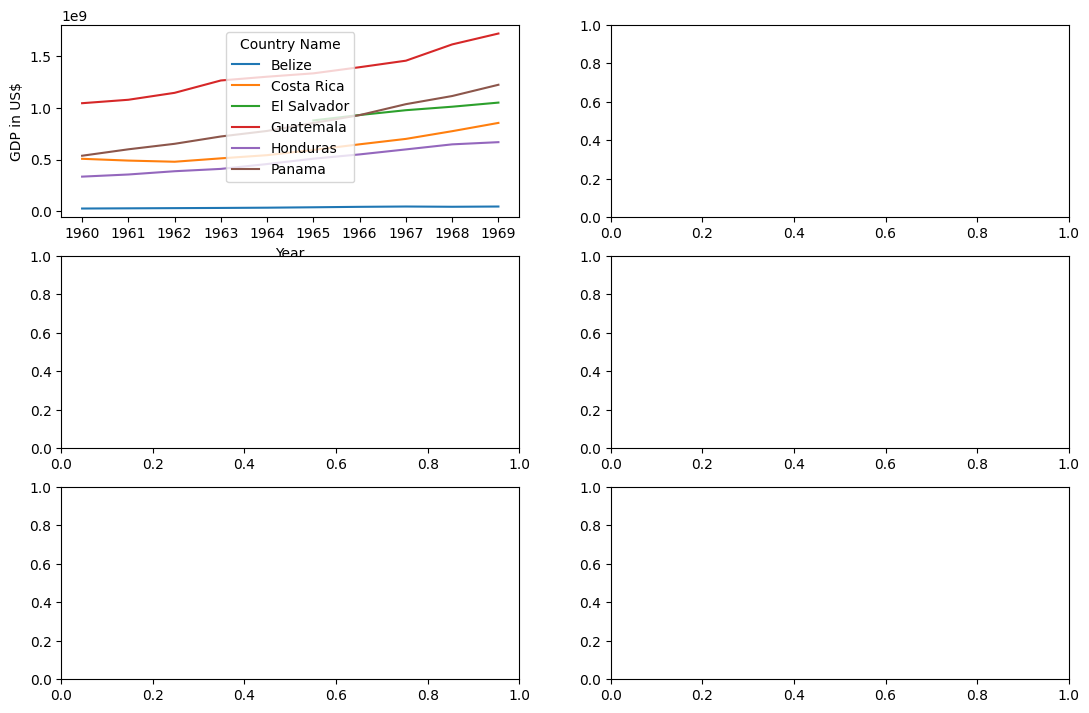

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(13, 8.5))

for ax, years, decade in zip(axes.flatten(), decade_years, decade_names):
    sns.lineplot(
        data=central_america.filter(pl.col('Year').is_in(years)),
        x='Year',
        y='Value',
        hue='Country Name',
        ax=ax
    ).set(xticks=years, ylabel='GDP in US$')
    
    fig.suptitle(f'Comparing GDP growth between six\nCentral American countries in the {decade}')
    if ax != axes.flatten()[3]:
        ax.get_legend().remove()
    else:
        ax.legend(title='Country', bbox_to_anchor=(1, 1))

plt.tight_layout()